# Expectation-Maximization

## Algoritmo

1. Inicializar <math>$p(w|\theta_d)$</math> con valores aleatorios
2. Mientras verosimilitud no cambie:
    1. Mejorar esa inicialización de forma iterativa usando paso-E y paso-M

### Paso-E

$$
p^{(n)}(z = 0 | w) = \frac{p(\theta_d) * p^{(n)}(w|\theta_d)}{p(\theta_d) * p^{(n)}(w | \theta_d) + p(\theta_B) * p(w| \theta_B)}
$$

### Paso-M

$$
p^{(n+1)}(w | \theta_d) = \frac{count(w, d) p^{(n)}(z = 0 | w)}{\sum_{w' = w_1}^{w_M}count(w', d) p^{(n)}(z = 0 | w')}
$$

## Ejemplo

### Valores iniciales

d = "w1 w1 w1 w1 w2 w2 w3 w3 w3 w3 w4 w4"

$p(\theta_d) = p(\theta_B) = 0.5$

\begin{array}{|c|c|}
Palabra & count & p(w | \theta_B) & p^{(1)}(w | \theta_d) & p^{(1)}(z = 0 | w)&p^{(2)}(w | \theta_d)&p^{(2)}(z = 0 | w)\\
w_1&  4&  0.5&  0.25&  0.33&  0.20\\
w_2&  2&  0.3&  0.25&  0.45&  0.14\\
w_3&  4&  0.1&  0.25&  0.71&  0.44\\
w_4&  2&  0.1&  0.25&  0.71&  0.22
\end{array}

*Tarea: Resolver la tabla hasta n = 6 y programar ambas fórmulas*

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
d = [*['w1']*4, *['w2']*2, *['w3']*4, *['w4']*2]
d

['w1', 'w1', 'w1', 'w1', 'w2', 'w2', 'w3', 'w3', 'w3', 'w3', 'w4', 'w4']

### Valores iniciales

* prob_theta : $ [p(\theta_d), p(\theta_b)] $
* likelihoods : $p(w_i | \theta_j), \ i \in |V|, \ j \in \{B, d\} $
* counts : $ [count(w_i, d), ..., count(w_{|V|}, d)] $

In [3]:
ITERAC = 20
vocab = {
    0 : 'w1',
    1 : 'w2',
    2 : 'w3',
    3 : 'w4',
}
inv_vocab = { v: k for k, v in vocab.items() }
prioris = np.array([0.5, 0.5])
likelihoods = np.array([
                           [0.5, 0.25],
                           [0.3, 0.25],
                           [0.1, 0.25],
                           [0.1, 0.25],
])
estimados_w = np.zeros(4)
counter = Counter(d)
counts = np.zeros(4)
for w, freq in counter.items():
  counts[inv_vocab[w]] = freq

In [4]:
# Expectation
def paso_E(prioris, likelihoods):
  temp = (likelihoods*prioris).T
  return temp[1]/sum(temp)

In [5]:
# Maximization
def paso_M(counts, estimados_w): 
  temp = estimados_w*counts
  return temp/temp.sum()

In [6]:
hist_pwthd = [np.array(likelihoods.T[1])]
hist_pz0w = []
print('Iniciales')
# print('p(z=0 | w) ')
# print(estimados_w)
print('p(w | theta_d)')
print(hist_pwthd[0], '\n')

# Iteraciones 
for i in range(ITERAC):
  print(f'Iteración {i+1}')
  estimados_w = paso_E(prioris, likelihoods)
  print('p(z=0 | w)')
  print(estimados_w)
  hist_pz0w.append(estimados_w)
  prob_w_th = paso_M(counts, estimados_w)
  print('p(w | theta_d)')
  print(prob_w_th)
  hist_pwthd.append(prob_w_th)
  print('')
  likelihoods = likelihoods.T
  likelihoods[1] = prob_w_th
  likelihoods = likelihoods.T
  # print(likelihoods)
# print(hist_pwthd)
# print(hist_pz0w)

Iniciales
p(w | theta_d)
[0.25 0.25 0.25 0.25] 

Iteración 1
p(z=0 | w)
[0.33333333 0.45454545 0.71428571 0.71428571]
p(w | theta_d)
[0.20424403 0.13925729 0.43766578 0.21883289]

Iteración 2
p(z=0 | w)
[0.29001883 0.31702899 0.81401085 0.68635607]
p(w | theta_d)
[0.18061582 0.0987185  0.50694376 0.21372192]

Iteración 3
p(z=0 | w)
[0.26537117 0.24758947 0.83524009 0.68124637]
p(w | theta_d)
[0.16956308 0.07910059 0.53368978 0.21764654]

Iteración 4
p(z=0 | w)
[0.25324437 0.20865331 0.84219408 0.68518467]
p(w | theta_d)
[0.16419305 0.06764103 0.54604339 0.22212253]

Iteración 5
p(z=0 | w)
[0.24720682 0.18398663 0.84521163 0.68955912]
p(w | theta_d)
[0.16165853 0.06015815 0.55271804 0.22546529]

Iteración 6
p(z=0 | w)
[0.2443232  0.16703258 0.84679449 0.69274757]
p(w | theta_d)
[0.16063245 0.05490852 0.55673252 0.22772651]

Iteración 7
p(z=0 | w)
[0.2431495  0.15471177 0.84773101 0.69486753]
p(w | theta_d)
[0.16042375 0.05103741 0.55931101 0.22922782]

Iteración 8
p(z=0 | w)
[0.24291033

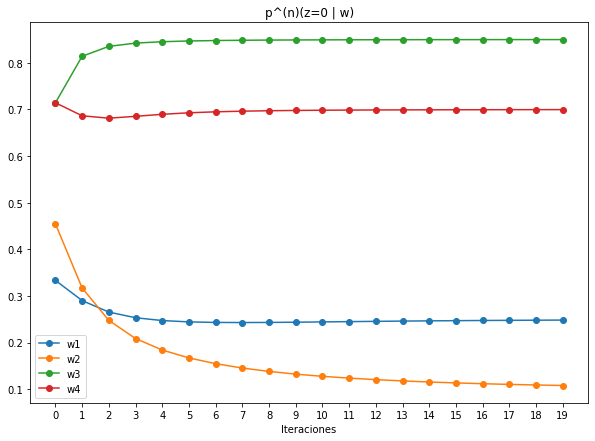

In [7]:
plt.figure(figsize=(10,7))
plt.title('p^(n)(z=0 | w)')
x = range(ITERAC)
y_n = np.array(hist_pz0w).T
# print(y_n)
for i, y in enumerate(y_n):
    line, = plt.plot(x, y, marker = 'o')
    line.set_label(vocab[i])
    plt.legend()
plt.xlabel('Iteraciones')
plt.xticks(x)
# plt.savefig('p^{(n)}(z=0 | w)')
plt.show()

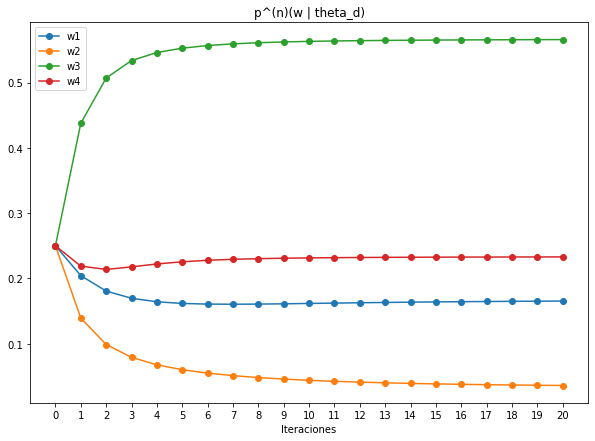

In [8]:
plt.figure(figsize=(10,7))
plt.title('p^(n)(w | theta_d)')
x = range(ITERAC+1)
y_n = np.array(hist_pwthd).T
# print(y_n)
for i, y in enumerate(y_n):
    line, = plt.plot(x, y, marker = 'o')
    line.set_label(vocab[i])
    plt.legend()
plt.xlabel('Iteraciones')
plt.xticks(x)
# plt.savefig('p^{(n)}(z=0 | w)')
plt.show()